<a href="https://www.kaggle.com/code/gamuchiraindawana/forecasting-walmart-sales?scriptVersionId=110858930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv


**Importing More Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('Imports Successful')

Imports Successful


# Read In The Data

In [3]:
walmart_data = pd.read_csv('../input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv')
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Let's Perform Some Visualizations

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

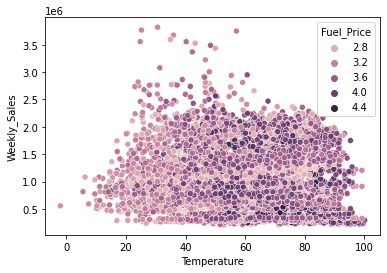

In [5]:
sns.scatterplot(x=walmart_data['Temperature'], y=walmart_data['Weekly_Sales'], hue=walmart_data['Fuel_Price'])

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

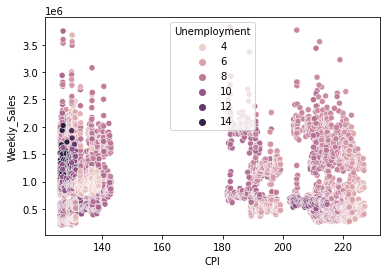

In [6]:
sns.scatterplot(x=walmart_data['CPI'], y=walmart_data['Weekly_Sales'], hue=walmart_data['Unemployment'])

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

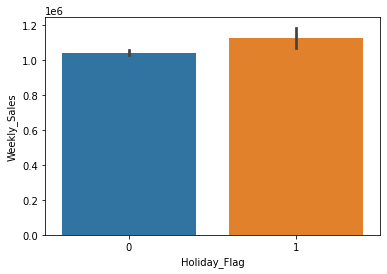

In [7]:
sns.barplot(x=walmart_data['Holiday_Flag'], y=walmart_data['Weekly_Sales'])

# Let's Build A Random Forest Model

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
print('Successfully Imported Libraries')

Successfully Imported Libraries


**Build the model**

In [9]:
forest_model = RandomForestRegressor()

**Split the data**

In [10]:
features = ['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
X = walmart_data[features]
y = walmart_data['Weekly_Sales']
train_X, val_X, train_y, val_y = train_test_split(X,y)
print('Success')

Success


**Fit The Model**

In [11]:
forest_model.fit(train_X,train_y)
print('Success')

Success


**The Mean Absolute Error**

In [12]:
forest_sales_predictions = forest_model.predict(val_X)
random_forest_mae = metrics.mean_absolute_error(val_y,forest_sales_predictions)
print(random_forest_mae)

78666.54146923554


**The Root Mean Squared Error**

In [13]:
random_forest_rmse = np.sqrt(metrics.mean_squared_error(val_y,forest_sales_predictions))
print(random_forest_rmse)

147529.9161828565


# Let's Build A Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = metrics.mean_absolute_error(val_y, preds_val)
    return(mae)

In [16]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size,train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size =  min(scores, key=scores.get)
print(best_tree_size)

100


In [17]:
tree_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size,random_state=0)
tree_model.fit(train_X,train_y)
tree_model_predictions = tree_model.predict(val_X)

**The Mean Absolute Error**

In [18]:
decision_tree_mae = metrics.mean_absolute_error(val_y,tree_model_predictions)
print(decision_tree_mae)

90835.91255853768


**The Root Mean Squared Error**

In [19]:
decision_tree_rmse = np.sqrt(metrics.mean_squared_error(val_y,tree_model_predictions))
print(decision_tree_rmse)

175286.77238075214


# The **BLUE** scatter plot was created by the **DECISION TREE** model
# The **ORANGE** scatter plot was created by the **RANDOM FOREST** model

<AxesSubplot:xlabel='Weekly_Sales'>

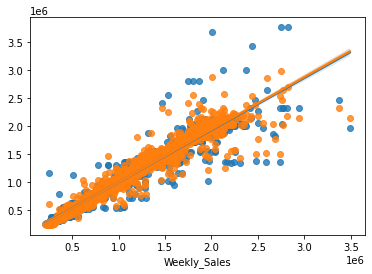

In [20]:
sns.regplot(x=val_y,y=tree_model_predictions)
sns.regplot(x=val_y, y=forest_sales_predictions)

# Which Model Had The Greater Error Term?

In [21]:
print(((decision_tree_rmse-random_forest_rmse)/random_forest_rmse) * 100)
print(((decision_tree_mae-random_forest_mae)/random_forest_mae)*100)

18.814391627181763
15.469564139998784
